In [ ]:

pip install git+https://github.com/openai/CLIP.git


In [11]:
pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76570 sha256=624fe719e8f2721c056eee1db5dcd444993052a41f130a3f147cfbcfd6ac28dd
  Stored in directory: c:\users\zilly\appdata\local\pip\cache\wheels\95\85\b7\b4b7040e49367b6d1505d7e8fb57e3e79b22fa6ac26f72520b
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52366 sha256=d0d3fed8113ed4579e1acd15854aa96d13feb69104a3edc23bec8c86ad026f45
  Stored in directory: c:\users\zilly\appdata\local\pip\cache\wheels\c7\0d\f8\e89d09e0c7419141e444bd59072cc195df4a88785c1052834b
Successfully built umap-learn pynndescent
Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import clip
import torchvision
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True)

Files already downloaded and verified


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

num_images=dataset.data.shape[0]

import numpy as np

arr = np.arange(num_images)

np.random.shuffle(arr)

image_labels= np.zeros(num_images, dtype=int)
i=0
for i in range(num_images):
  image_labels[i]=dataset[arr[i]][1]


In [3]:
image_features=np.zeros([dataset.data.shape[0],512])
with torch.no_grad():
  i=0
  for i in range(num_images):
    img = preprocess(dataset[arr[i]][0]).unsqueeze(0).to(device)
    #img=dataset[i][0]
    #img.save('test.png')
    #image_features[i,:]= model.encode_image(img)
    image_features[i,:]= model.encode_image(img).cpu()
    i+=1
    if (i%1000==0):
      print('i: '+str(i))

i: 1000
i: 2000
i: 3000
i: 4000
i: 5000
i: 6000
i: 7000
i: 8000
i: 9000
i: 10000
i: 11000
i: 12000
i: 13000
i: 14000
i: 15000
i: 16000
i: 17000
i: 18000
i: 19000
i: 20000
i: 21000
i: 22000
i: 23000
i: 24000
i: 25000
i: 26000
i: 27000
i: 28000
i: 29000
i: 30000
i: 31000
i: 32000
i: 33000
i: 34000
i: 35000
i: 36000
i: 37000
i: 38000
i: 39000
i: 40000
i: 41000
i: 42000
i: 43000
i: 44000
i: 45000
i: 46000
i: 47000
i: 48000
i: 49000
i: 50000


In [7]:
imax=1000
import pandas as pd
import time
df_subset=pd.DataFrame()
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [8]:
# Let's map 
imax=10000
df_subset=pd.DataFrame()
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(image_features[0:imax])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.628s...
[t-SNE] Computed neighbors for 10000 samples in 78.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.501855
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.394547
[t-SNE] KL divergence after 300 iterations: 2.789490
t-SNE done! Time elapsed

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

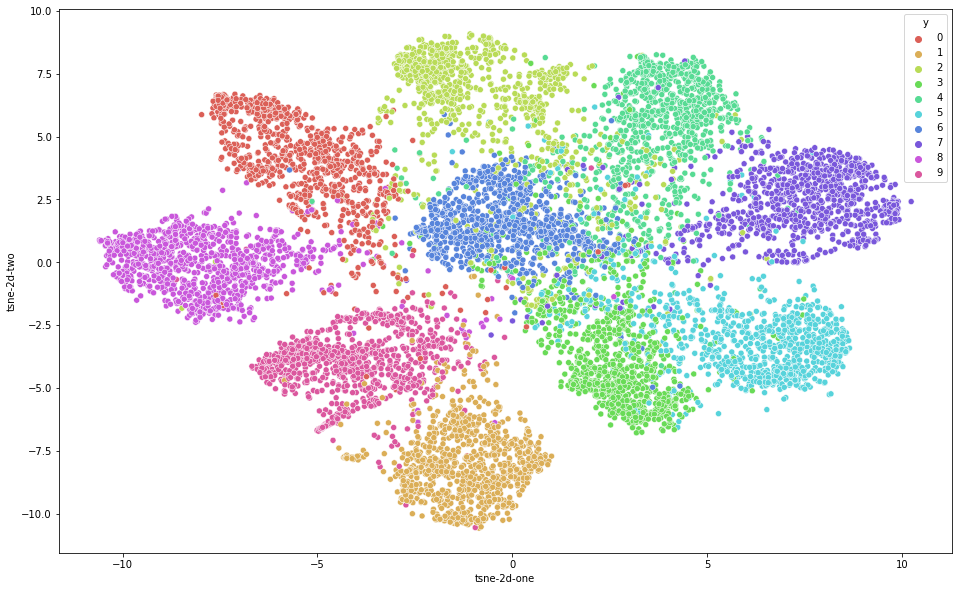

In [9]:
%matplotlib inline
import seaborn as sns

# Create the Plot with t-SNE. We can now clearly distinct different clusters by optical inspection
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = (image_labels[0:imax])
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#    color='black',
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1.0
)


In [12]:
import umap
reducer = umap.UMAP()

In [13]:
# Let's map 
imax=50000
df_subset=pd.DataFrame()
time_start = time.time()
umap_results = reducer.fit_transform(image_features[0:imax])
print('umap done! Time elapsed: {} seconds'.format(time.time()-time_start))

umap done! Time elapsed: 34.36994171142578 seconds


<AxesSubplot:xlabel='umap-2d-one', ylabel='umap-2d-two'>

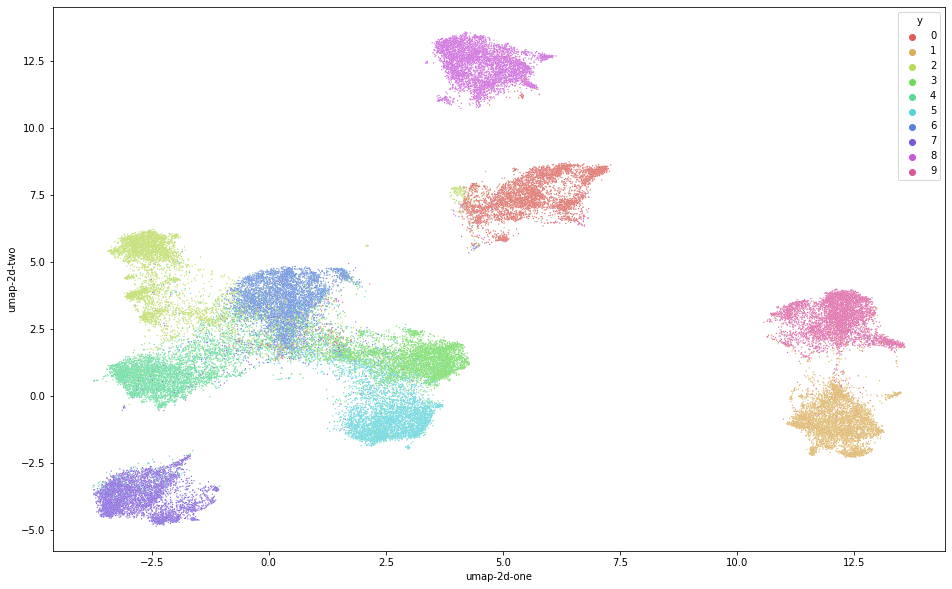

In [14]:
import seaborn as sns

# Create the Plot with Umap-Learn. We can now clearly distinct different clusters by optical inspection
df_subset['umap-2d-one'] = umap_results[:,0]
df_subset['umap-2d-two'] = umap_results[:,1]
df_subset['y'] = image_labels[0:imax]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
#    color='black',
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1.0,
    s=1.7
)

In [5]:
device

'cuda'

In [15]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [28]:
n=image_features.shape[1]
m=image_features.shape[0]

In [29]:
m

50000

In [45]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm


#vectors=get_clip_vectors()
vectors=image_features

m=len(vectors)
# Clip uses a 512-dimensional vector
n=512
matrix=np.zeros((m,n),np.half)
filenames=[]
for i in range(len(vectors)):
    #print(i)
    matrix[i,:]=normalize(vectors[i])
    #filenames.append(dict(vectors[i])['filenameHash'])
    
matrix.shape
#np.savez_compressed('test.npz',matrix)

(50000, 512)

In [23]:
n

512

In [87]:
n=512

queryString="Bird"
#queryString="Cat"

import requests
#metadataClipServer = os.getenv("METADATA_CLIP", "http://metadata_clip:8003/uploadtext/"+queryString)
metadataClipServer="http://192.168.188.204:8003/uploadtext/"+queryString

clip_response = requests.get(metadataClipServer).json()

In [88]:
# Create Vector and normalize it
matrixB=np.zeros((n,1),np.half)
matrixB[:,0]=normalize(clip_response[0])
# Multiply with Images Matrix
result=np.matmul(matrix,matrixB)
# Sort the result
indizes=np.argsort(result[:,0])[::-1]
resultindex=list(indizes)

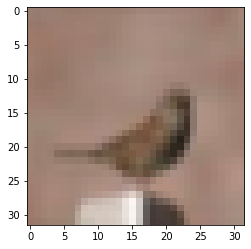

In [90]:
#df=pd.DataFrame(filenames,columns=['filename'])
#dfres=df.filename[resultindex].head(10)
#dfres.values[0]
# Show 10 best images
for i in range(1):
    #a=Image.open('/home/jovyan/data/imageblobstorage/'+dfres.values[i]+'.png')
    #a.show()
    plt.imshow(dataset[arr[resultindex][i]][0])

In [47]:
resultindex

[44892,
 15214,
 12203,
 43350,
 38791,
 36835,
 29149,
 20358,
 40808,
 45699,
 45120,
 14253,
 7894,
 35040,
 6149,
 27543,
 49061,
 23668,
 4008,
 24171,
 28394,
 5087,
 20745,
 12316,
 37523,
 12064,
 5735,
 7878,
 32002,
 16989,
 37499,
 36029,
 22669,
 9352,
 34201,
 2927,
 25974,
 11872,
 4188,
 9290,
 3097,
 1910,
 47729,
 14366,
 46430,
 24669,
 4308,
 23108,
 45119,
 40800,
 1974,
 25712,
 21684,
 27281,
 27961,
 15081,
 41603,
 43956,
 17083,
 6375,
 45309,
 15423,
 35419,
 40067,
 7785,
 44009,
 49014,
 9378,
 31534,
 25517,
 8684,
 30440,
 4155,
 32299,
 49649,
 46392,
 46904,
 36788,
 14420,
 9127,
 19983,
 18114,
 25057,
 14521,
 48925,
 6022,
 27478,
 32614,
 3106,
 14399,
 17200,
 32856,
 16302,
 7714,
 46043,
 24985,
 20808,
 19443,
 29565,
 42312,
 34254,
 27003,
 47525,
 49582,
 12680,
 17122,
 18944,
 14355,
 27891,
 48908,
 32506,
 26604,
 24228,
 43520,
 16227,
 36393,
 17432,
 42739,
 14215,
 40272,
 19950,
 32278,
 25486,
 11676,
 9218,
 47965,
 44754,
 10417,
